In [1]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from ukbb_recessive.regression.regressions import read_results_excel
import ukbb_recessive.regression.plotting as plotting
from matplotlib.cm import get_cmap


sns.set_style("whitegrid")

# Add fonts
plotting.add_fonts(['../../../data/fonts'])
plotting.configure_matplotlib()

Added: .../ukbb_recessive/data/fonts/Arimo-VariableFont_wght.ttf


# Prepare datasets

## Per panel regressions

In [2]:
tables_folder = '../../../data/tables'
output_folder = '../../../data/plots'

use_dataset = 'Roulette'

results_path = f"{tables_folder}/table_panel_analysis.xlsx"

# load flat table
panels = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
panels = panels[panels['feature'].str.contains("s_het")]

# add odds ratio distance
panels = plotting.add_odds_ratio_intervals(panels)
panels = plotting.add_effect_size_intervals(panels)

# filter out dataset
if use_dataset:
    panels = panels[panels['dataset'] == use_dataset]

In [3]:
# Dictionary to rename target columns
renaming_dict_target = {
    'is_blond': 'Hair color', 
    'years_of_edu': 'Years of\neducation',
    'diagnosis_total_ICD10_cnt_log': 'Diagnoses\ncount (log)',
    'ICD_infertility': 'Infertility',
    'living_with_a_partner': 'Has partner',
    'fluid_intelligence_score': 'Fluid\nintelligence',
    'childlessness': 'Childlessness'
}

# select targets of interest
panels = panels[panels['target'].isin(renaming_dict_target.keys())].copy()
panels['target'] = panels['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
panels = panels[panels['gender'] == 'all']

# select analyses
renaming_dict_panel = {
    's_het_recessive_Blindness': 'Blindness',
	's_het_recessive_Cilia_Kidney': 'Cilia + Kidney',
	's_het_recessive_Deafness': 'Deafness',
	's_het_recessive_Derm': 'Dermatologic',
	's_het_recessive_Endocrine': 'Endocrine',
	's_het_recessive_Hematologic': 'Hematologic',
	's_het_recessive_ID_total': 'ID',
	's_het_recessive_Immune_system': 'Immune system',
	's_het_recessive_Metabolic': 'Metabolic',
	's_het_recessive_Metabolic_ID': 'Metabolic-ID',
	's_het_recessive_Neuromuscular': 'Neuromuscular',
	's_het_recessive_Overlaps': 'Multi-system',
	's_het_recessive_Skeletal_Craniofacial': 'Skeletal'
}

panels = panels[panels['feature'].isin(renaming_dict_panel.keys())].copy()
panels['analysis'] = panels['feature'].apply(lambda x: renaming_dict_panel.get(x, x))


print("Target:", panels['target'].unique())

panels.head(3)

Target: ['Childlessness' 'Years of\neducation' 'Diagnoses\ncount (log)'
 'Fluid\nintelligence' 'Hair color']


dataset                   feature    effect  odds_ratio  \
3   Roulette  s_het_recessive_ID_total  1.013822    2.756114   
11  Roulette  s_het_recessive_ID_total -3.931058    0.019623   
19  Roulette  s_het_recessive_ID_total  0.546401    1.727026   

    odds_ratio_lower  odds_ratio_upper odds_ratio_pretty       p_value  \
3           1.199866          6.330842        OR = 2.756  1.688291e-03   
11          0.003625          0.106231       ES = -3.931  2.029891e-09   
19          1.234984          2.415108        ES = 0.546  2.704695e-05   

    p_value_corrected  bonferroni_correction_coef  ...  gender analysis  \
3        2.363607e-02                          14  ...     all       ID   
11       2.841848e-08                          14  ...     all       ID   
19       3.786573e-04                          14  ...     all       ID   

                                              formula    family  \
3   childlessness ~ s_het_recessive_ID_total + age...  binomial   
11  years_of_edu ~ s_het_recessive_ID_total + age_...  gaussian   
19  diagnosis_total_ICD10_cnt_log ~ s_het_recessiv...  gaussian   

   p_value_pretty p_value_corrected_pretty odds_ratio_lower_distance  \
3       1.69×10⁻³                    0.024                  1.556248   
11      2.03×10⁻⁹                2.84×10⁻⁸                  0.015998   
19      2.70×10⁻⁵                3.79×10⁻⁴                  0.492042   

   odds_ratio_upper_distance  effect_lower_distance  effect_upper_distance  
3                   3.574728               0.831612               0.831612  
11                  0.086608               1.688918               1.688918  
19                  0.688082               0.335343               0.335343  

[3 rows x 22 columns]

In [4]:
panels['analysis'].unique()

array(['ID', 'Metabolic-ID', 'Blindness', 'Cilia + Kidney', 'Deafness',
       'Dermatologic', 'Endocrine', 'Hematologic', 'Immune system',
       'Neuromuscular', 'Skeletal', 'Metabolic', 'Multi-system'],
      dtype=object)

## ID vs rest regressions

In [5]:
use_dataset = 'Roulette'

results_path = f"{tables_folder}/table_id_vs_rest_analysis.xlsx"

# load flat table
id_vs_rest = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
id_vs_rest = id_vs_rest[id_vs_rest['feature'].str.contains("s_het")]

# add odds ratio distance
id_vs_rest = plotting.add_odds_ratio_intervals(id_vs_rest)
id_vs_rest = plotting.add_effect_size_intervals(id_vs_rest)

# filter out dataset
if use_dataset:
    id_vs_rest = id_vs_rest[id_vs_rest['dataset'] == use_dataset]

In [6]:
id_vs_rest['feature'].unique()

array(['s_het_recessive_AR_without_ID', 's_het_recessive_ID_total'],
      dtype=object)

In [7]:
# Dictionary to rename target columns
renaming_dict_target = {
    'is_blond': 'Hair color', 
    'years_of_edu': 'Years of\neducation',
    'diagnosis_total_ICD10_cnt_log': 'Diagnoses\ncount (log)',
    'ICD_infertility': 'Infertility',
    'living_with_a_partner': 'Has partner',
    'fluid_intelligence_score': 'Fluid\nintelligence',
    'childlessness': 'Childlessness'
}

# select targets of interest
id_vs_rest = id_vs_rest[id_vs_rest['target'].isin(renaming_dict_target.keys())].copy()
id_vs_rest['target'] = id_vs_rest['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
id_vs_rest = id_vs_rest[id_vs_rest['gender'] == 'all']

# select analyses
renaming_dict_feature = {
    's_het_recessive_AR_without_ID': 'Other recessive genes',
	's_het_recessive_ID_total': 'Recessive ID genes',
}

id_vs_rest = id_vs_rest[id_vs_rest['feature'].isin(renaming_dict_feature.keys())].copy()


id_vs_rest.loc[:, 'analysis'] = id_vs_rest['feature'].apply(lambda x: renaming_dict_feature.get(x, x))


print("Target:", id_vs_rest['target'].unique())

id_vs_rest.head(3)

Target: ['Childlessness' 'Years of\neducation' 'Diagnoses\ncount (log)'
 'Fluid\nintelligence' 'Hair color']


dataset                        feature    effect  odds_ratio  \
3   Roulette  s_het_recessive_AR_without_ID  0.351723    1.421514   
11  Roulette  s_het_recessive_AR_without_ID -1.096313    0.334101   
19  Roulette  s_het_recessive_AR_without_ID  0.261079    1.298330   

    odds_ratio_lower  odds_ratio_upper odds_ratio_pretty   p_value  \
3           0.866127          2.333033        OR = 1.422  0.067458   
11          0.124135          0.899206       ES = -1.096  0.004341   
19          1.066865          1.580012        ES = 0.261  0.000615   

    p_value_corrected  bonferroni_correction_coef  ...  gender  \
3            0.944414                          14  ...     all   
11           0.060778                          14  ...     all   
19           0.008610                          14  ...     all   

                 analysis                                            formula  \
3   Other recessive genes  childlessness ~ s_het_recessive_AR_without_ID ...   
11  Other recessive genes  years_of_edu ~ s_het_recessive_AR_without_ID +...   
19  Other recessive genes  diagnosis_total_ICD10_cnt_log ~ s_het_recessiv...   

      family p_value_pretty p_value_corrected_pretty  \
3   binomial          0.067                    0.944   
11  gaussian      4.34×10⁻³                    0.061   
19  gaussian      6.15×10⁻⁴                8.61×10⁻³   

   odds_ratio_lower_distance odds_ratio_upper_distance  effect_lower_distance  \
3                   0.555387                  0.911519               0.495446   
11                  0.209965                  0.565106               0.990070   
19                  0.231464                  0.281682               0.196354   

    effect_upper_distance  
3                0.495446  
11               0.990070  
19               0.196354  

[3 rows x 22 columns]

In [8]:
id_vs_rest['analysis'].unique()

array(['Other recessive genes', 'Recessive ID genes'], dtype=object)

## S-het data

In [9]:
s_het_paths = {
    'Weghorn-drift': ".../450k/selection_weghorn/weghorn_drift_gencode-v34.txt",
    'Cassa': "../450k/selection/Cassa_nature_2017/gene_s_het_cassa_all_genes_gencode-v34.txt",
    'PLI': ".../450k/selection_pli/gnomad.v2.1.1.PLI_gencode-v34.txt", 
    "Roulette": ".../450k/selection_roulette/s_het_roulette_gencode-v34.csv",
    'GeneBayes': ".../450k/selection_genebayes/s_het_genebayes_gencode-v34.csv"
}

s_het_tag = 'Roulette'

#gene panel
gene_panel = pd.read_csv(".../450k/regions/gene-panel-gencode-v34.txt", header=None)
gene_panel.columns = ['Gene name', 'Gene panel']

gene_panel.loc[gene_panel['Gene panel'] != 'ID-total', 'Gene panel'] = 'Other \nrecessive'
gene_panel.loc[gene_panel['Gene panel'] == 'ID-total', 'Gene panel'] = 'Recessive ID'

gene_panel.tail(3)

Gene name         Gene panel
1926       XPC  Other \nrecessive
1927  ZMPSTE24  Other \nrecessive
1928    ZNF469  Other \nrecessive

In [10]:
s_het_df = pd.read_csv(s_het_paths[s_het_tag], sep='\t').rename(columns={'gene_symbol': 'Gene name'}).merge(
    gene_panel, on='Gene name', how='inner')
s_het_df['Gene panel'] = s_het_df['Gene panel'].fillna('Non-recessive')

s_het_df = s_het_df.sort_values(by=['Gene panel', 's_het']).copy()

s_het_df['Gene panel'].value_counts()

Gene panel
Other \nrecessive    1533
Recessive ID          357
Name: count, dtype: int64

In [11]:
hue_order = ['Recessive ID', 'Other \nrecessive']

s_het_df['Gene panel'] = pd.Categorical(s_het_df['Gene panel'], categories = hue_order, ordered=True)

# Plot

In [14]:
def plot_s_het_comparison(ax, s_het_df):

    hue_order = ['Recessive ID', 'Other \nrecessive']
    
    colors = ['#151B54','#F5E216']

    s_het_df['Gene panel'] = pd.Categorical(s_het_df['Gene panel'], categories = hue_order, ordered=True)
    s_het_df = s_het_df.sort_values(by='Gene panel')

    # sns.pointplot(
    #     data=s_het_df, x="s_het", y='Gene panel', hue='Gene panel',
    #     estimator='median',
    #     errorbar=("ci", 95), capsize=0, err_kws={'linewidth': 1},
    #     color=".5", order=hue_order, linestyles='', 
    #     palette=colors, markers='s', ax=ax, markersize=3
    # )

    sns.boxenplot(
        data=s_het_df, x="s_het", y='Gene panel', hue='Gene panel',
        color=".5", order=hue_order, 
        palette=colors,  ax=ax, 
    )

    plotting.configure_axis(ax, x_label="Median s-het (95% CI)")


def plot_panels(ax, target_order, analysis_order, plot_entity='odds_ratio', vline_loc=1, legend_loc='upper left', ylim=None, colors=None, markersize=3):

    # group_order = ['Singleton LoFs in non-recessive genes', 'PLPs in recessive genes'][::-1]

    legend_kwargs = {
        "bbox_to_anchor": (0.0, 1, 1, .102), 
        "frameon": False,
        "mode": "expand", 
        "ncol": 4, 
        "labelspacing": 0.1, 
        "markerfirst": False, 
        'fontsize': plotting.MEDIUM_SIZE
    }
    plot_data = panels[panels['target'].isin(target_order)].copy()

    plotted_data = plotting.plot_errorbar_grouped(df=plot_data, 
                                        axis=ax, y_column='analysis', 
                                        group_column = 'target',  
                                        # title='', 
                                        legend_loc=legend_loc, 
                                        legend_kwargs=legend_kwargs,
                                        group_scale=0.2, 
                                        y_scale=1,
                                        colors=colors,
                                        group_order=target_order, 
                                        y_order=analysis_order,
                                        plot_entity=plot_entity, 
                                        vertical_loc=vline_loc, 
                                        horizontal=False, 
                                        markersize=markersize)

    x_label = 'Effect size' if plot_entity == 'effect' else 'Odds ratio'
    
    plotting.configure_axis(ax, x_label=x_label, y_label=None, ymargin=0.02, xlim=ylim, format_x=True)
    # configure_axis(ax, x_label=x_label, y_label=None, ymargin=0.02, xlim=ylim, format_x=True)


    # # Display p-values or any other information in the sidebar
    # p_values = plotted_data['p_value_corrected_pretty']
    # or_values = plotted_data['odds_ratio_pretty']
    # positions = plotted_data['y']

    # plot_loc = plotted_data[f'{plot_entity}'] - plotted_data[f'{plot_entity}_lower_distance']

    # for i, (loc, p, oddsr, pos) in enumerate(zip(plot_loc, p_values, or_values, positions)):
    #     ax.text(-2, pos+0.005, f'{oddsr}   {p}', va='center', size=plotting.MEDIUM_SIZE)


def plot_id_vs_rest(ax, target_order, analysis_order, plot_entity='odds_ratio', vline_loc=1, legend_loc='upper left'):

    legend_kwargs = {
        "bbox_to_anchor": (-0.5, 1.2, 1.2, .102), 
        "frameon": False,
        "mode": "expand", 
        "ncol": 2, 
        "labelspacing": 0.1, 
        "markerfirst": False, 
        'fontsize': plotting.MEDIUM_SIZE
    }

    # colors = ['#151B54','#F5E216']
    colors = [ '#d43d51', '#094074',]
    # colors = [ "#176d8f", "#d43d51"]
    
    plot_data = id_vs_rest[id_vs_rest['target'].isin(target_order)].copy()

    plotted_data = plotting.plot_errorbar_grouped(df=plot_data, 
                                        axis=ax, 
                                        y_column='target', 
                                        group_column = 'analysis',  
                                        # group_column ='target', 
                                        # y_column = 'analysis',
                                        # title='', 
                                        legend_loc=legend_loc, 
                                        legend_kwargs=legend_kwargs,
                                        group_scale=0.25, 
                                        y_scale=0.8,
                                        colors=colors,
                                        group_order=analysis_order, 
                                        # y_order=target_order,
                                        # y_order=analysis_order,
                                        plot_entity=plot_entity, 
                                        vertical_loc=vline_loc, 
                                        horizontal=False)
    
    x_label = 'Effect size' if plot_entity == 'effect' else 'Odds ratio'
    
    plotting.configure_axis(ax, x_label=x_label, y_label=None,  format_x=True)

    # Display p-values or any other information in the sidebar
    p_values = plotted_data['p_value_corrected_pretty']
    positions = plotted_data['y']

    plot_loc = plotted_data[f'{plot_entity}'] - plotted_data[f'{plot_entity}_lower_distance']

    for i, (loc, p, pos) in enumerate(zip(plot_loc, p_values, positions)):
        ax.text(loc, pos+0.005, f'P = {p}', va='center', size=plotting.SMALL_SIZE)

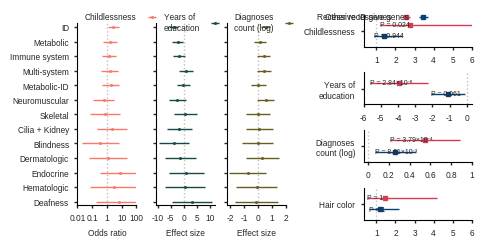

In [15]:
cm = 1/2.54  # centimeters in inches
k = 1.
fig = plt.figure(constrained_layout=True, figsize=(12*cm*k, 6*cm*k))

# divide subfigure into left and right parts
subfigs = fig.subfigures(nrows=1, ncols=2, width_ratios=[ 0.8, 0.5], wspace=0.03)

# plot panels
axes_left = subfigs[0].subplots(1, 3, sharey=True)

targets = ['Childlessness'][::-1] # reverse because we use x-axis
colors = [  '#FC766AFF']

analysis_order = panels.sort_values(by='effect_lower_distance', ascending=True)['analysis'].unique().tolist()
plot_panels(axes_left[0], target_order = targets, analysis_order=analysis_order, plot_entity='odds_ratio', vline_loc=1, 
            ylim=(0.01,100), colors=colors, markersize=1)

axes_left[0].set_xscale('log')
axes_left[0].set_xticks([0.01, 0.1, 1, 10, 100])
axes_left[0].set_xticklabels([0.01, 0.1, 1, 10, 100])

targets = ['Years of\neducation', ][::-1] # reverse because we use x-axis
colors = [  '#184A45FF', ]

plot_panels(axes_left[1], target_order = targets, analysis_order=analysis_order, plot_entity='effect', vline_loc=0, 
            ylim=None, colors=colors, markersize=1)
axes_left[1].yaxis.set_tick_params(labelleft=False)
axes_left[1].set_xticks([-10, -5, 0, 5, 10])
axes_left[1].set_xticklabels([-10, -5, 0, 5, 10])

targets = ['Diagnoses\ncount (log)', ][::-1] # reverse because we use x-axis
colors = [ '#665D1E', ]
plot_panels(axes_left[2], target_order = targets, analysis_order=analysis_order, plot_entity='effect', vline_loc=0, 
            ylim=None, colors=colors, markersize=1)
axes_left[2].yaxis.set_tick_params(labelleft=False)
axes_left[2].set_xticks([-2, -1, 0, 1, 2])
axes_left[2].set_xticklabels([-2, -1, 0, 1, 2])

# plot id-vs-rest
# ax_right = subfigs[1].subfigures(nrows=2, ncols=1, height_ratios=[3, 1], wspace=0.03)

axes = subfigs[1].subplots(4, 1)
# targets = ['Childlessness', 'Hair color']
analysis_order = ['Recessive ID genes', 'Other recessive genes']

plot_id_vs_rest(axes[0], target_order = ['Childlessness'],
                analysis_order=analysis_order, plot_entity='odds_ratio', vline_loc=1, )
axes[0].set_xlabel(None)
axes[0].set_xticks([1, 2, 3, 4, 5, 6])
axes[0].set_xticklabels([1, 2, 3, 4, 5, 6])
axes[0].margins(y=0.9)

plot_id_vs_rest(axes[1], target_order = ['Years of\neducation'], 
                analysis_order=analysis_order, plot_entity='effect', vline_loc=0, legend_loc=None)
axes[1].set_xlabel(None)
axes[1].set_xticks([-6, -5,  -4, -3, -2, -1, 0])
axes[1].set_xticklabels([-6, -5,  -4, -3, -2, -1, 0])
axes[1].margins(y=0.9)

plot_id_vs_rest(axes[2], target_order = ['Diagnoses\ncount (log)'], 
                analysis_order=analysis_order, plot_entity='effect', vline_loc=0, legend_loc=None)
axes[2].set_xlabel(None)
axes[2].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axes[2].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
axes[2].margins(y=0.9)

plot_id_vs_rest(axes[3], target_order = ['Hair color'], 
                analysis_order=analysis_order, plot_entity='odds_ratio', vline_loc=1, legend_loc=None)
axes[3].set_xlabel(None)
axes[3].set_xticks([1, 2, 3, 4, 5, 6])
axes[3].set_xticklabels([1, 2, 3, 4, 5, 6])
axes[3].margins(y=0.9)

axes[0].sharex(axes[3])

plt.savefig(f"{output_folder}/figure_3.pdf", format="pdf", bbox_inches="tight")

plt.show()

# Median test

In [19]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    s_het_df.loc[s_het_df['Gene panel'] == 'Other \nrecessive', 's_het'], 
    s_het_df.loc[s_het_df['Gene panel'] == 'Recessive ID', 's_het']
)

print("T-test statistic:", stat)
print("P-value:", p_value)


T-test statistic: -4.363369243155857
P-value: 1.3499186508557687e-05


In [25]:
from scipy.stats import median_test

res = median_test(
    s_het_df.loc[s_het_df['Gene panel'] == 'Other \nrecessive', 's_het'], 
    s_het_df.loc[s_het_df['Gene panel'] == 'Recessive ID', 's_het']
)

print("Mood's median test statistic:", res.statistic)
print("P-value:", res.pvalue)


Mood's median test statistic: 13.275008633590424
P-value: 0.0002689676484524137
